# Please uncomment and import the following packages to make this work

In [1]:
# pip install ccxt
# pip install pandas
# pip install numpy
# pip install datetime
# pip install matplotlib
# pip install from stocktrends 
#!pip install --upgrade ta

In [2]:
import pandas as pd
import numpy as np
import ccxt
import datetime as dt
import json
import requests
import matplotlib.pyplot as plt
from stocktrends import Renko, indicators
import seaborn as sns
import statistics
from ta.volatility import AverageTrueRange

# Functions and other necessary things

In [3]:
# #Function to get 24 hour for 3 min
# def get_bars(symbol, interval = '3m'):
#     root_url = 'https://api.binance.com/api/v1/klines'
#     url = root_url + '?symbol=' + symbol + '&interval=' + interval
#     data = json.loads(requests.get(url).text)
#     df = pd.DataFrame(data)
#     df.columns = ['open_time',
#                  'open', 'high', 'low', 'close', 'volume',
#                  'close_time', 'qav', 'num_trades',
#                  'taker_base_vol', 'taker_quote_vol', 'ignore']
#     df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
#     df.reset_index(inplace = True)
#     df['date'] = df['index']
#     df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype('float')
#     df['open_time'] = pd.to_datetime(df['open_time'],unit = "ms")
#     df['close_time'] = pd.to_datetime(df['close_time'],unit = "ms")
#     return df

#Function to return Ichimoku values 
def ichimoku(dataframe, conversion_line_period=9, base_line_periods=26, 
              laggin_span=52, displacement=26): 
     #Ichimoku cloud indicator 

     df = dataframe.copy() 

     high_9 = df['high'].rolling(window=conversion_line_period).max() 
     low_9 = df['low'].rolling(window=conversion_line_period).min() 
     df['tenkan_sen'] = (high_9 + low_9) / 2 

     high_26 = df['high'].rolling(window=base_line_periods).max() 
     low_26 = df['low'].rolling(window=base_line_periods).min() 
     df['kijun_sen'] = (high_26 + low_26) / 2 

     # this is to extend the 'df' in future for 26 days 
     # the 'df' here is numerical indexed df 
     last_index = df.iloc[-1:].index[0] 
     last_date = df['date'].iloc[-1].date() 

     df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26) 

     high_52 = df['high'].rolling(window=laggin_span).max() 
     low_52 = df['low'].rolling(window=laggin_span).min() 
     df['senkou_span_b'] = ((high_52 + low_52) / 2).shift(displacement) 

     # most charting softwares dont plot this line 
     df['chikou_span'] = df['close'].shift(displacement*-1)  # sometimes -26 
  
     return { 
         'tenkan_sen': df['tenkan_sen'], 
         'kijun_sen': df['kijun_sen'], 
         'senkou_span_a': df['senkou_span_a'], 
         'senkou_span_b': df['senkou_span_b'], 
         'chikou_span': df['chikou_span'], 
         'cloud_green': df['senkou_span_a'] > df['senkou_span_b'], 
         'cloud_red': df['senkou_span_b'] > df['senkou_span_a'] 
     } 


In [4]:
#LIST OF USEFUL CALLS AND WHAT THEY DO

# binance.fapiPublic_get_ticker_24hr()
'''
24h summary of all tickers
Can't figure out how to specify ticker
List
Dict order
{'symbol': 'BTCUSDT',
 'priceChange': '60.60',
 'priceChangePercent': '0.521',
 'weightedAvgPrice': '11687.60',
 'lastPrice': '11697.24',
 'lastQty': '0.048',
 'openPrice': '11636.64',
 'highPrice': '11784.21',
 'lowPrice': '11575.78',
 'volume': '132272.584',
 'quoteVolume': '1545948827.30',
 'openTime': 1598822880000,
 'closeTime': 1598909306515,
 'firstId': 195816875,
 'lastId': 196301241,
 'count': 484365}
'''

# fapiPublic_get_historicaltrades

'''
IDK
'''

# fapiPublicGetTicker24hr
'''
24h summary of all tickers
Can't figure out how to specify ticker
List
'''

# fapiPrivate_get_openorders
'''
list of open orders
{}
'''

# fapiPrivate_get_balance

'''
List showing account balance in USDT and BNB
list[0] is dict

{'accountAlias': 'Alias',
 'asset': 'USDT',
 'balance': 'balance',
 'withdrawAvailable': 'available',
 'updateTime': 1598596107504}
 
'''


# fapiPrivate_delete_allopenorders

'''
DELETES OPEN ORDERS
'''


'\nDELETES OPEN ORDERS\n'

# This is me testing binance package calls and seeing the output

In [5]:
# test_call = binance.fapiPublic_get_ticker_24hr()

# Ignore this block. It's just to keep

In [6]:
# This is for formatting MEGA file
# large = 4
# hour = 0
# test = pd.DataFrame()
# test['high'] = ''
# test['low'] = ''
# test['open'] = ''
# test['close'] = ''
# test['date'] = ''
# values = []

# for i in range(len(df)):
#     if i==(len(df)-1):
#         values.append(df['mark_price'][i])
#         data = {'high':max(values), 'low':min(values), 'open':values[0], 'close':values[len(values)-1], 'date':df['timestamp'][i]}
#         test = test.append(data,  ignore_index=True)
#         large+=5
#         values = []
#         break
    
#     if df['timestamp'][i].minute<large and df['timestamp'][i].minute==0:
#         values.append(df['mark_price'][i])
        
#     if df['timestamp'][i].minute != 0 and df['timestamp'][i+1].minute==0 and df['timestamp'][i].hour!=23:
#         large = 4
#         values.append(df['mark_price'][i])
#         data = {'high':max(values), 'low':min(values), 'open':values[0], 'close':values[len(values)-1]}
#         test = test.append(data,  ignore_index=True)
#         values = []
        
        
#     if df['timestamp'][i].minute<large:
#         values.append(df['mark_price'][i])
        
#     if df['timestamp'][i+1].minute > large and df['timestamp'][i+1].minute!=0:
#         values.append(df['mark_price'][i])
#         data = {'high':max(values), 'low':min(values), 'open':values[0], 'close':values[len(values)-1],'date':df['timestamp'][i]}
#         test = test.append(data,  ignore_index=True)
#         large+=5
        
        
        
 
            

# API KEYS

In [7]:
# Bringing in secret key
binance=ccxt.binance({
    ''
    'apiKey': 'KEY',
    'secret': 'SECRET',
    'timeout': 30000,
    'enableRateLimit': True,
})

# Pulling in the data from my computer

In [8]:
cd Desktop

C:\Users\jonat\Desktop


In [9]:
cd CryptoDaTa

C:\Users\jonat\Desktop\CryptoDaTa


In [10]:
# Bring in data and format correctly
df = pd.read_csv(f'ETHUSDT-5m.csv')
df = df.rename(columns = {'_t':'date','_o':'open', '_h':'high', '_l':'low', '_c':'close','_v':'volume'})
df['date'] = pd.to_datetime(df['date'], unit = 'ms')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,date,open,high,low,close,volume
0,2020-06-01 00:00:00,231.55,231.55,230.61,231.17,11936.720
1,2020-06-01 00:05:00,231.15,232.77,231.11,232.53,13297.875
2,2020-06-01 00:10:00,232.55,233.40,232.40,233.08,11815.278
3,2020-06-01 00:15:00,233.07,233.78,232.95,233.06,9007.776
4,2020-06-01 00:20:00,233.06,233.51,232.96,233.20,4261.493


In [11]:
atr = AverageTrueRange(df['high'], df['low'], df['close'], n=14)
atr = atr.average_true_range()
atr = [x for x in atr if x!=0]

In [12]:
brick_size = statistics.mean(list(atr))

In [59]:
brick_size


0.7883013421623912

# Renko-ify data

In [64]:
#Turn data into renko

renko = Renko(df)
renko.brick_size = 2.96
data = renko.get_ohlc_data()
print(data.tail())


                    date        open        high         low       close  \
3908 2020-08-19 23:05:00  407.551794  407.551794  406.763493  406.763493   
3909 2020-08-19 23:10:00  406.763493  406.763493  405.975191  405.975191   
3910 2020-08-19 23:15:00  406.763493  407.551794  406.763493  407.551794   
3911 2020-08-19 23:30:00  407.551794  408.340095  407.551794  408.340095   
3912 2020-08-19 23:35:00  407.551794  407.551794  406.763493  406.763493   

      uptrend  
3908    False  
3909    False  
3910     True  
3911     True  
3912    False  


In [67]:
test = ichimoku(data)
ichi_df = data.copy()
random = pd.DataFrame(test)
ichi_df = ichi_df.join(random)


# Visualizations!

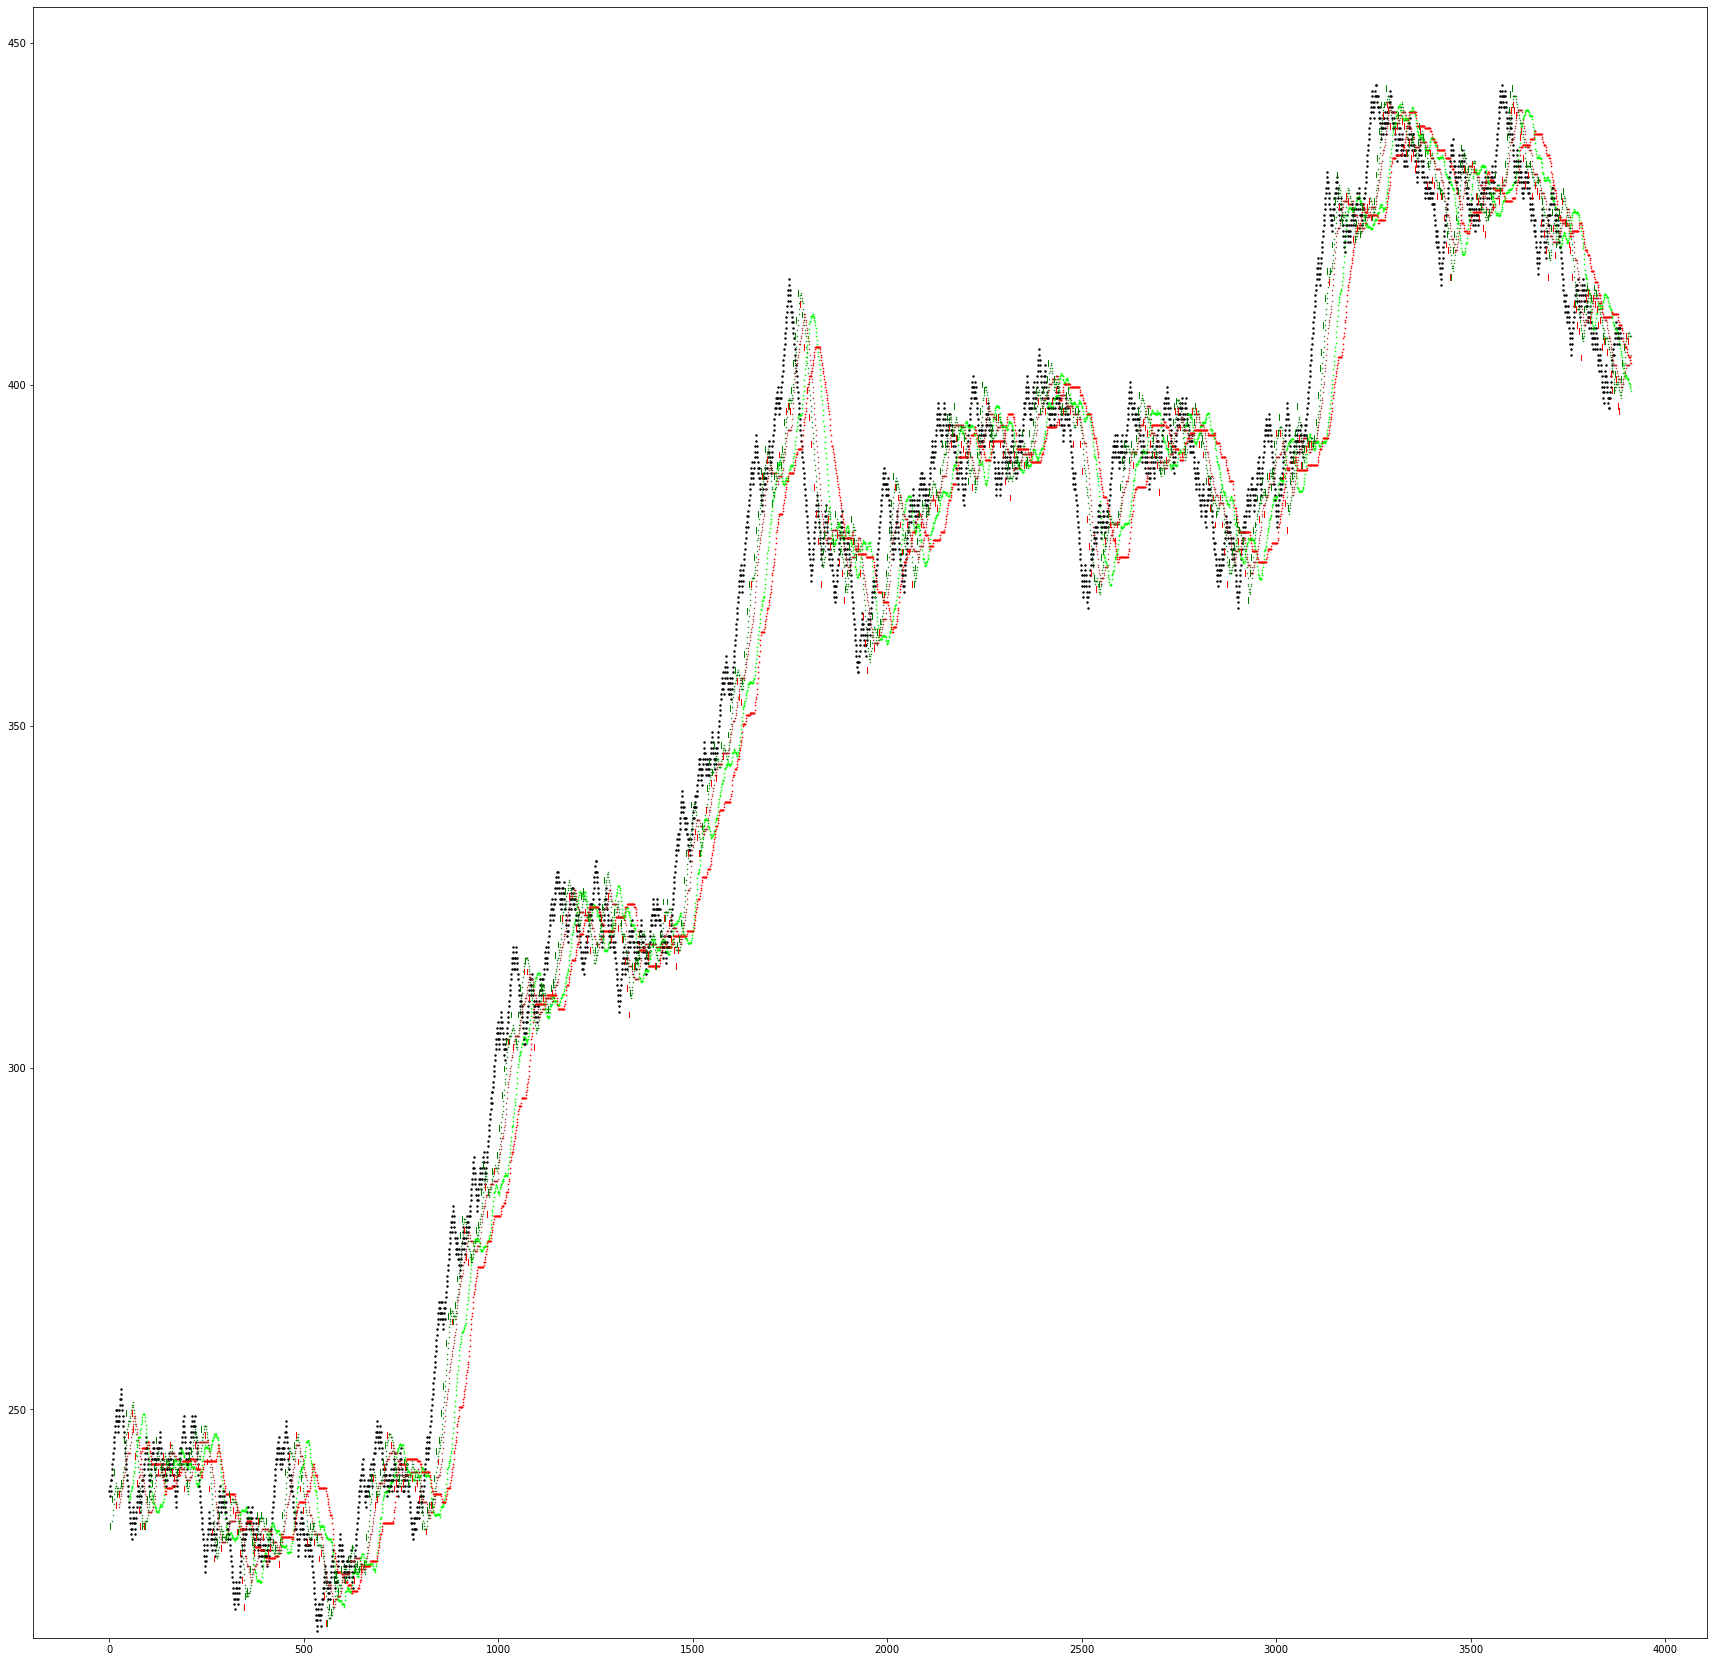

In [15]:
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

for i in range(len(data)):
   
    if data['uptrend'][i]:
        ax.bar(i,1, width = 0.5, color = 'g', bottom = data['close'][i]-1, align = 'center')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = 2)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)
    else:
        ax.bar(i, 1, width = 0.5, color = 'r', bottom = data['close'][i]-1, align = 'edge')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = 2)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)
plt.show()

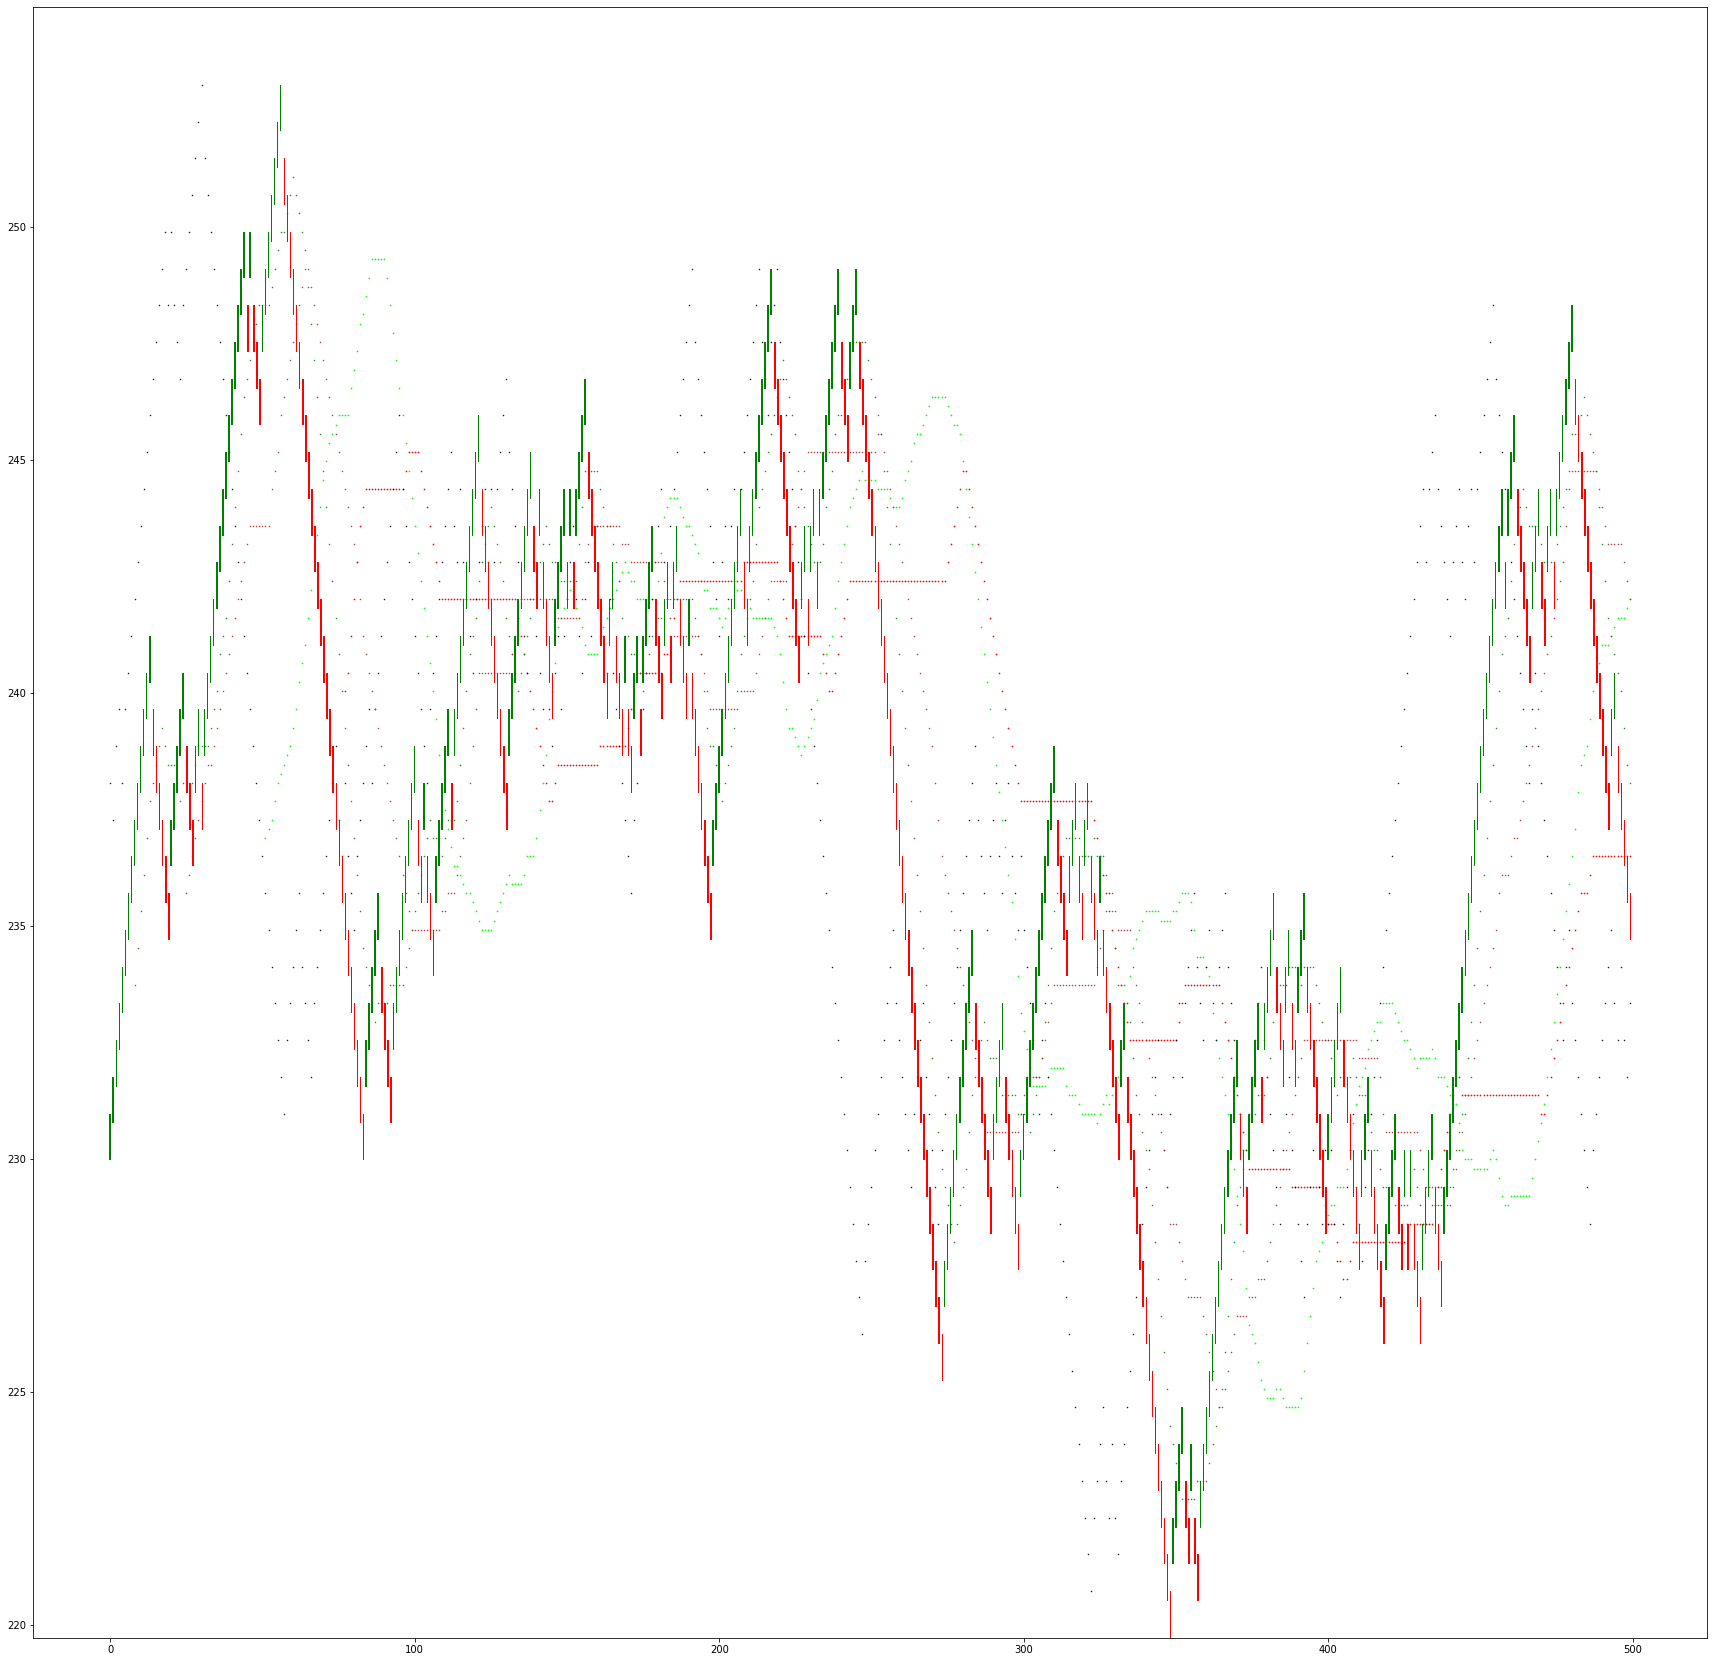

In [16]:
plot_df = data[0:500]
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

for i in range(len(plot_df)):
   
    if plot_df['uptrend'][i]:
        ax.bar(i,1, width = 0.5, color = 'g', bottom = plot_df['close'][i]-1, align = 'center')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = .25)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)
    else:
        ax.bar(i, 1, width = 0.5, color = 'r', bottom = plot_df['close'][i]-1, align = 'edge')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = .25)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)

plt.show()

In [18]:
len(ichi_df)

3913

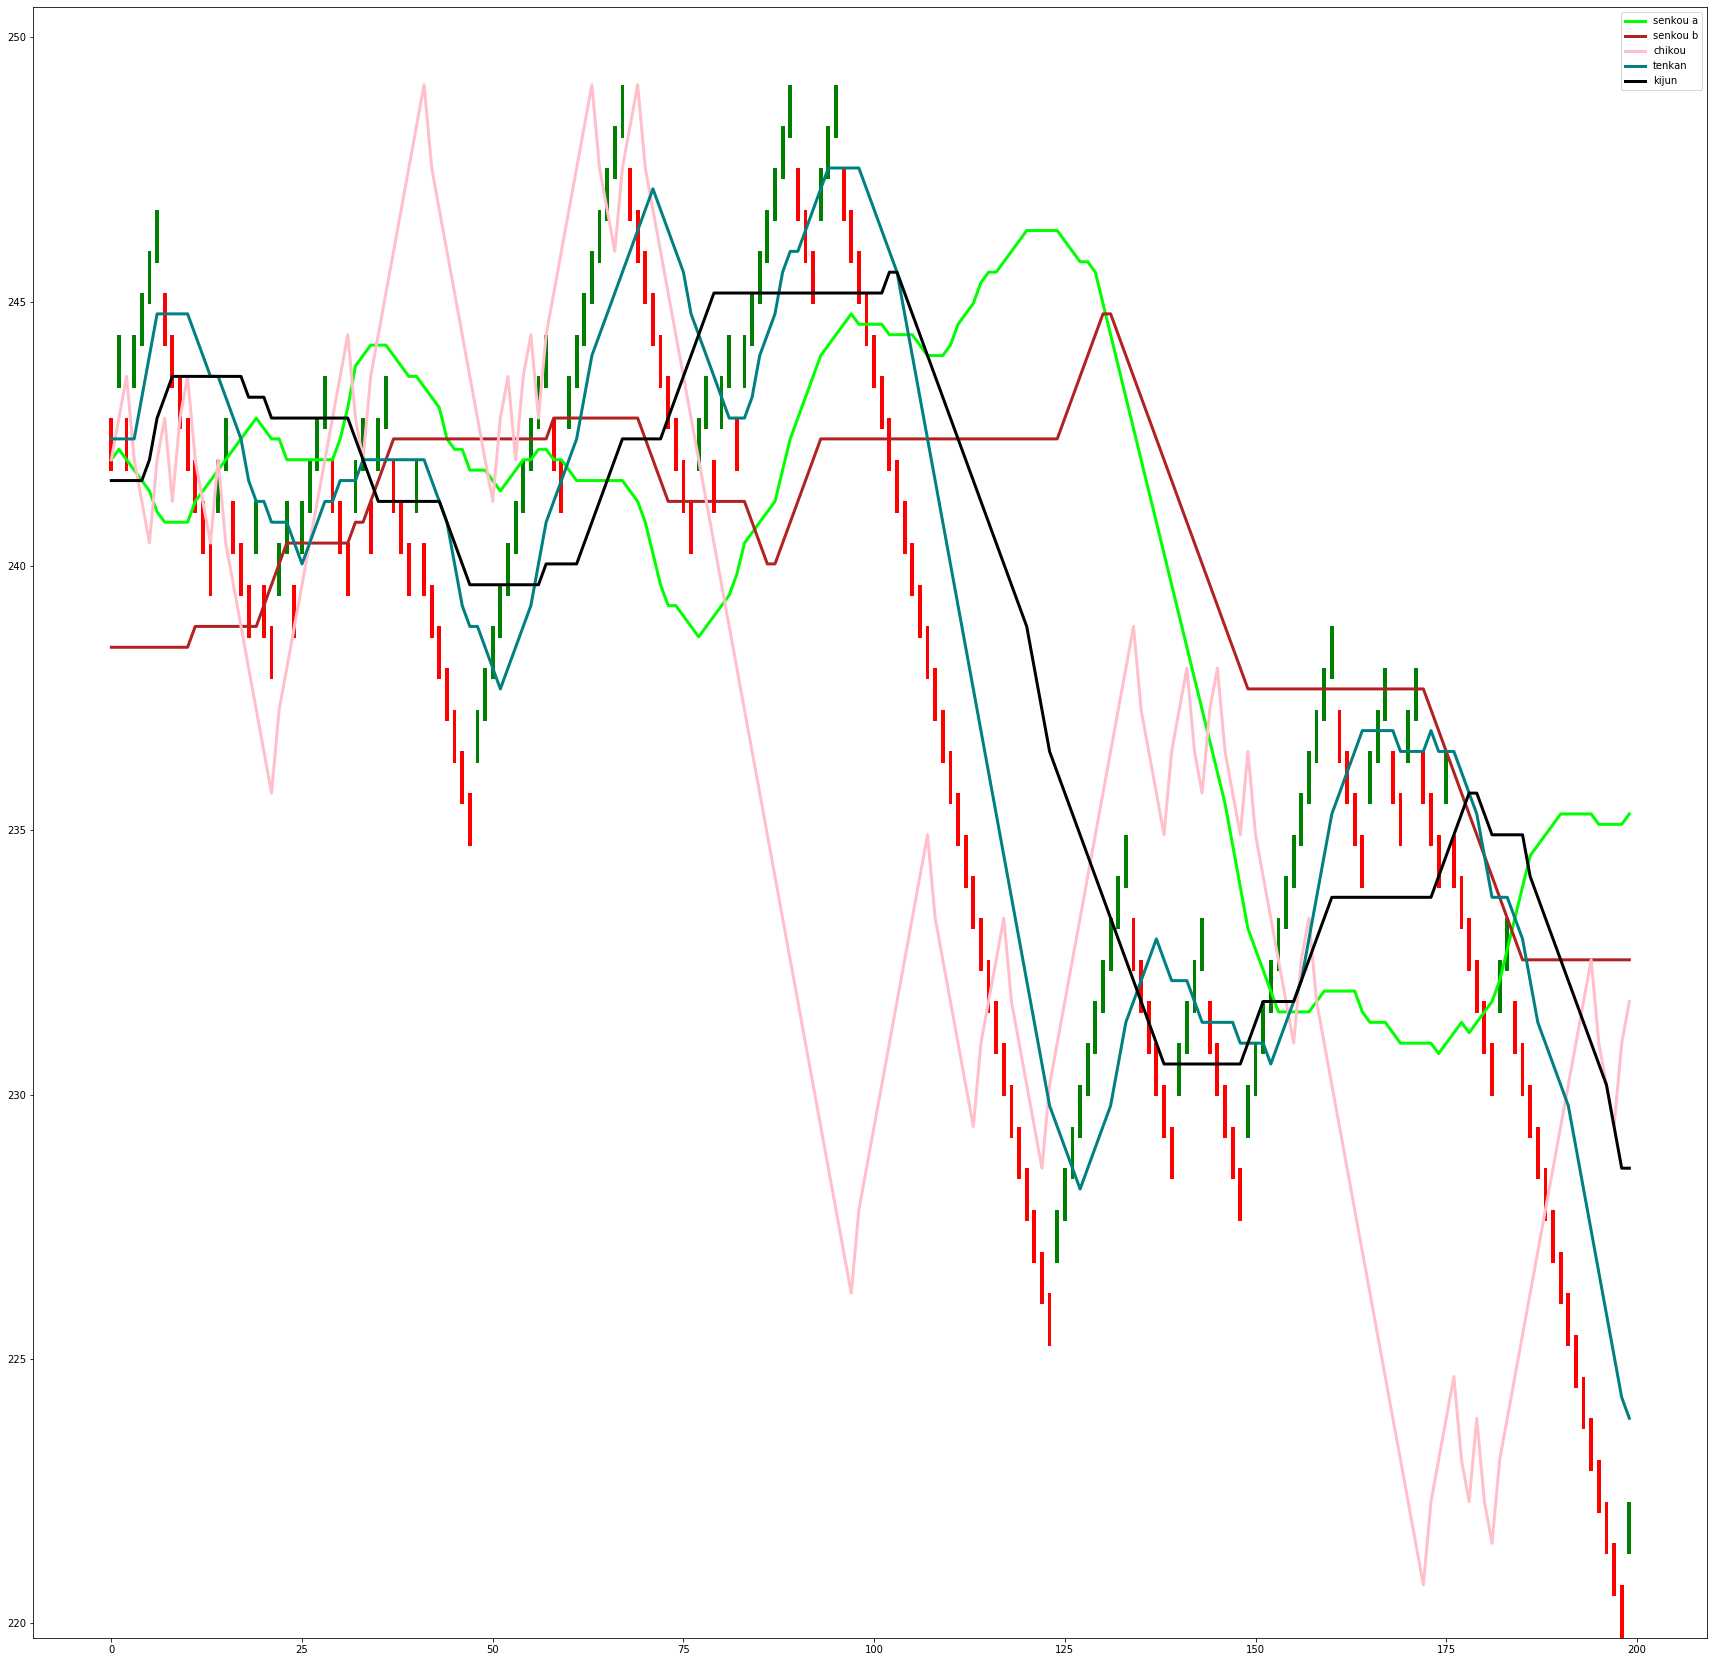

In [19]:
plot_df = ichi_df[150:350].reset_index() 
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

for i in range(len(plot_df)):
   
    if plot_df['uptrend'][i]:
        ax.bar(i,1, width = 0.5, color = 'g', bottom = plot_df['close'][i]-1, align = 'center')
        
        
   
    else:
        ax.bar(i, 1, width = 0.5, color = 'r', bottom = plot_df['close'][i]-1, align = 'center')
        
        
     
''
plt.plot(plot_df.index.values,(plot_df[0:200]['senkou_span_a']), color = 'lime', linewidth = 3, label = 'senkou a')
plt.plot(plot_df.index.values,(plot_df[0:200]['senkou_span_b']), color = 'firebrick', linewidth = 3, label = 'senkou b')
plt.plot(plot_df.index.values,(plot_df[0:200]['chikou_span']), color = 'pink', linewidth = 3, label = 'chikou')
plt.plot(plot_df.index.values,(plot_df[0:200]['tenkan_sen']), color = 'teal', linewidth = 3, label = 'tenkan')
plt.plot(plot_df.index.values,(plot_df[0:200]['kijun_sen']), color = 'black', linewidth = 3, label = 'kijun')


plt.legend()
plt.show()

# Actual STRATEGY TIME!

In [20]:
ichi_df[150:180].head(20)

,date,open,high,low,close,uptrend,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,cloud_green,cloud_red
150,2020-06-05 00:05:00,243.585115,243.585115,242.796813,242.796813,False,242.402663,241.614361,242.008512,238.461156,242.008512,True,False
151,2020-06-05 01:35:00,243.585115,244.373416,243.585115,244.373416,True,242.402663,241.614361,242.205587,238.461156,242.796813,True,False
152,2020-06-05 03:50:00,243.585115,243.585115,242.796813,242.796813,False,242.402663,241.614361,242.008512,238.461156,243.585115,True,False
153,2020-06-05 06:50:00,243.585115,244.373416,243.585115,244.373416,True,242.402663,241.614361,241.811437,238.461156,242.008512,True,False
154,2020-06-05 08:40:00,244.373416,245.161717,244.373416,245.161717,True,243.190964,241.614361,241.614361,238.461156,241.220211,True,False
155,2020-06-05 08:40:00,245.161717,245.950019,245.161717,245.950019,True,243.979265,242.008512,241.417286,238.461156,240.431909,True,False
156,2020-06-05 08:40:00,245.950019,246.738320,245.950019,246.738320,True,244.767567,242.796813,241.023135,238.461156,242.008512,True,False
157,2020-06-05 10:05:00,245.950019,245.950019,245.161717,245.161717,False,244.767567,243.190964,240.826060,238.461156,242.796813,True,False
158,2020-06-05 10:10:00,245.161717,245.161717,244.373416,244.373416,False,244.767567,243.585115,240.826060,238.461156,241.220211,True,False
159,2020-06-05 10:10:00,244.373416,244.373416,243.585115,243.585115,False,244.767567,243.585115,240.826060,238.461156,242.796813,True,False


In [21]:
#Values all start at 77
ichi_df.head(77)

,date,open,high,low,close,uptrend,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,cloud_green,cloud_red
0,2020-06-01 00:00:00,230.183992,230.972293,230.183992,230.972293,True,NaN,NaN,NaN,NaN,238.067005,False,False
1,2020-06-01 00:05:00,230.972293,231.760595,230.972293,231.760595,True,NaN,NaN,NaN,NaN,237.278704,False,False
2,2020-06-01 00:10:00,231.760595,232.548896,231.760595,232.548896,True,NaN,NaN,NaN,NaN,238.855307,False,False
3,2020-06-01 01:00:00,232.548896,233.337197,232.548896,233.337197,True,NaN,NaN,NaN,NaN,239.643608,False,False
4,2020-06-01 01:30:00,233.337197,234.125499,233.337197,234.125499,True,NaN,NaN,NaN,NaN,238.067005,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2020-06-02 14:45:00,240.431909,240.431909,239.643608,239.643608,False,243.190964,246.344169,245.358793,NaN,237.278704,False,False
73,2020-06-02 14:45:00,239.643608,239.643608,238.855307,238.855307,False,242.402663,245.950019,245.555868,NaN,238.067005,False,False
74,2020-06-02 14:45:00,238.855307,238.855307,238.067005,238.067005,False,241.614361,245.555868,245.752943,NaN,238.855307,False,False
75,2020-06-02 14:45:00,238.067005,238.067005,237.278704,237.278704,False,240.826060,245.161717,245.950019,NaN,237.278704,False,False


In [87]:
# Might need to add the -26 depending on backtest results. MACD EXIT SIGNAL
# do previous cloud convergence lead to greater profit
# Ask how many API calls i get per second per instrument
# Commission will be taken out of profit when i sell or stop loss

# Comission is backtested higher than usual. This is just because nothing is perfect and to account for real-world issues that are hard to forsee
def backtesting(df):
    # Short/Long/Stoploss/Exit/Take profit
    # Account balance
    # holding status
    # Holding amount
    # List of money earned from trades
    # Length in trade
    # How much in account. Can swap with futures 
    account_balance = 100000
    
    # 0 means looking and 1 means holding
    status = 0
    
    # Money earned
    earned = []
    
    # Time in winning trade
    wtimed = []
    
    # Time in losing trade
    ltimed = []
    
    # Holding money
    hold = ''
    
    #Identify if it is long or short
    long = 0
    short = 0
    
    #variable to make code easier to read
    money = 0
    
    # For counting time
    time = 0
    
    sl_counter = []
    
    for i in range(len(df)): 
        
#         #Enter in long trade. Price above cloud, faster>slower, not currently in a position
        if (df['open'][i]>=df['senkou_span_a'][i] and 
            df['cloud_green'][i]==True and 
            df['kijun_sen'][i]<=df['tenkan_sen'][i] and 
            #df['chikou_span'][i]>=df['senkou_span_a'][i-26] and
            #df['kijun_sen'][i-2]!=df['kijun_sen'][i-1] and
            df['uptrend'][i-1]==True and
            status == 0):
            
            #Change to enter position
            status=1
            
            #Invest 1k (investment amount can always change but easy math is easy)
            hold = (1000/df['open'][i+1])*-1
            #you're investing so you're not gonna have that 1k liquid
            account_balance +=-1000
            #make sure people know it's a long
            long = 1
            #Time start
            time = df['date'][i+1]
            
            
         #Exit a long trade
        elif (long == 1 and
              status == 1 and 
              (df['close'][i-26]>=df['chikou_span'][i] or
               #df['kijun_sen'][i-2]!=df['kijun_sen'][i-1] or
               df['kijun_sen'][i]>=df['tenkan_sen'][i])):
            #We are not holding
            status = 0
            long = 0
            # Calculate earnings with commission
            
            money = ((((df['open'][i+1])*0.00024)-1000))-(hold*(df['open'][i+1]))
            earned.append(money)
            if money>=0:
                wtimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
            else:
                ltimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                
         #stop loss for long (stop loss theoretically could be profitable if there was a massive jump)
        elif  (status == 1 and
               long ==1 and
               ((df['uptrend'][i-3]==False and df['uptrend'][i-2]==False and df['uptrend'][i-1]==False))):
            #We are not holding
            status = 0
            long = 0
            
            # Calculate earnings with commission
            
            money = ((((df['open'][i+1])*0.00024)-1000))-(hold*(df['open'][i+1]))
            earned.append(money)
            if money>=0:
              
                wtimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                money = 0
            else:
                
                ltimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                money = 0
        
            
        #Enter in a short trade. Price below cloud, faster<slower, not currently in a position
        elif (df['close'][i]<=df['senkou_span_a'][i] and            # price under cloud
            df['cloud_red'][i]==True and     #cloud is red
            df['kijun_sen'][i]>=df['tenkan_sen'][i] and     #Tenkan cross Kijun downwards
            df['uptrend'][i-1]==False and                           #Going down
            #df['chikou_span'][i]<=df['senkou_span_a'][i-26] and
            #df['kijun_sen'][i-2]!=df['kijun_sen'][i-1] and
            status == 0): 
            
           
            status = 1  #Change to enter position
            short = 1
            
            
            hold = (1000/df['open'][i+1]) #Invest 1k (calculates how much of the crypto I'm holding)
            
            account_balance +=-1000 #you're investing so you're not gonna have that 1k liquid
            
            time = df['date'][i+1] #time start
        
       
        #exit a short trade
        elif  (status == 1 and
               short == 1 and
               (df['close'][i-26]<=df['chikou_span'][i] or 
               
                #df['kijun_sen'][i-2]!=df['kijun_sen'][i-1] or
                df['kijun_sen'][i]<=df['tenkan_sen'][i])):
            #We are not holding
            status = 0
            short = 0
            
            #calculate earnings with commission
            
            money = ((((df['open'][i+1])*0.00024)+1000)-(hold*(df['open'][i+1])))
            earned.append(money)
            if money>=0:
                
                wtimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                money = 0
            else:
                
                ltimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                money = 0
        
       
        #stoploss for short (don't need long since it will be executed before)
        elif  (status == 1 and
               short ==1 and
               ((df['uptrend'][i-3]==True and df['uptrend'][i-2]==True and df['uptrend'][i-1]==True))):
                 #We are not holding
            status = 0
            short = 0
            #calculate earnings with commission
            
            money = ((((df['open'][i+1])*0.00024)+1000)-(hold*(df['open'][i+1])))
            earned.append(money)
            if money>=0:
                
                wtimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                money = 0
            else:
                
                ltimed.append((df['date'][i+1]-time).total_seconds()/60)
                time = 0
                money = 0
    profit = sum(earned)
    wins = [w for w in earned if w>0]
    loss = [l for l in earned if l<0]
    wtt = statistics.mean(wtimed)
    ltt = statistics.mean(ltimed)
    Twt = len(wtimed)
    Tlt = len(ltimed)
    TNT = len(earned)
    # SLC = len(sl_counter)
    ML = min(loss)
    MG = max(wins)
    MW = max(wins)
    AGBB = statistics.mean(wins)
    AL = statistics.mean(loss)
    PW = (len(wins)/TNT)*100
    print(f'Summary Report with renko strat is as follows:')
    print('------------------------------------------------------------')
    print(f'Amount earned is :                                {profit}')
    print(f'Avg time spent in winning trades:                 {wtt}')
    print(f'Avg time spent in losing trades:                  {ltt}')
    print(f"Total number of trades:                           {TNT}")
    print(f'Total number of winning trades:                   {Twt}')
    print(f'Total number of losing trades:                    {Tlt}')
    # print(f'Total number of stop losses:                      {SLC}') #This was for fixing code
    print(f'Max gain is:                                      {MG}')
    print(f'Max loss is:                                      {ML}')
    print(f'Avg gain is:                                      {AGBB}')
    print(f'Avg loss is:                                      {AL}')
    print(f'Percentage win:                                   {PW}')
   

In [88]:
backtesting(ichi_df)

Summary Report with renko strat is as follows:
------------------------------------------------------------
Amount earned is :                                868.1652631514235
Avg time spent in winning trades:                 136.02189781021897
Avg time spent in losing trades:                  72.84810126582279
Total number of trades:                           216
Total number of winning trades:                   137
Total number of losing trades:                    79
Max gain is:                                      63.608750646227236
Max loss is:                                      -10.001214168037336
Avg gain is:                                      8.35298819758953
Avg loss is:                                      -3.4961281002321805
Percentage win:                                   63.42592592592593


In [24]:
print(df['close'][10])
print(df['close'][77])

232.88
238.95


# Proof on long profit calc

#### Buy in when it's 232.88 and sell when it's 238.95

In [25]:
# Proof on how profit is calculated
hold = (1000/df['close'][10])*-1 #Enter long trade
money = (hold*(df['close'][10]))-(((df['close'][10])*0.00032)-1000) #exit at same price
print(money) #shows commission. 

#If the front number is higher, then that -0.7 should be positive 
money = ((((df['close'][77])*0.00032)-1000))-(hold*(df['close'][77])) #exit at lower price. 
print(money)

-0.07452159999991181
26.141390142219052


In [26]:
hold*df['close'][10]+1000

1.1368683772161603e-13

# Proof on short profit calc

#### Short when it's 238.95 and exit when it's 232.88

In [27]:
# Proof on how profit is calculated
hold = (1000/df['close'][77]) #Enter short trade
money = (hold*(df['close'][77]))-(((df['close'][77])*0.00032)+1000) #exit at same price
print(money) #shows commission. 

#If the front number is lower, then that -0.7 should be positive 
money = ((((df['close'][10])*0.00032)+1000)-(hold*(df['close'][10]))) #exit at same price
print(money)

-0.0764640000001009
25.477325533877433


# Proof on time frame

In [82]:
(ichi_df['date'][10]-ichi_df['date'][77]).total_seconds()/60

-2185.0